In [ ]:
import math
import random
import requests
import time

import numpy as np
import torch
import torchvision

import matplotlib.pyplot as plt
import torch.nn.functional as F

from io import BytesIO
from PIL import Image
from scipy.special import erf

# Lakota AI Code Camp Lesson 11: Introduction to Neural Networks I - Activation Functions

## Layers

Something we glossed over last class was the concept of a layer.
If you recall, we talked about composition when we were talking about matrix multiplication.
We're going to talk about that again, because neural networks can be thought of as the composition of many functions.
One thing about composition that is useful, is that it allows us to break a function into smaller components or make a more complicated function from simpler components.

Functions have an input and an output.
If we have two functions $f$ and $g$.
The composition of $f$ and $g$ just tells us that the input of $f$ is the output of $g\,$:
$$
f \circ g (x) = f (g (x)).
$$

A layer of a neural network typically consists of a linear function (recall the linear transformation) with a non-linear function ($\sin x$ is a nonlinear function).

So, we can think of a layer of a neural network as a function (which is the composition of two functions).
We compose the layers to get a neural network.
We talked about LeNet earlier.
That was a seven layer neural network, because there were seven function compositions.

1.   convolutional layer
1.   average pooling layer
1.   convolutional layer
1.   average pooling layer
1.   fully connected layer
1.   fully connected layer
1.   fully connected layer

## Activation Functions

We talked about a nonlinear function above.
Those nonlinear functions, in the context of neural networks, are called **activation functions**.
This terminology comes from an analogy with neurons.
When a neuron sends a signal to another neuron, it was said to be activated.

We'll talk about some activation functions, then we'll talk about the neural network layers.

### ReLU

ReLU stands for rectified linear unit.
It was first introduced, in the context of neural networks, in a paper by Fukushima: *Visual Feature Extraction by Visual Feature Extraction by a Multilayered Network of Analog Threshold Elements*.
The paper described the design of a neural network that could recognize handwritten digits.
This network was inspired by the visual system of cats and monkeys.
In neurons, a signal is propagated if the neuron receives enough signals from other neurons.
This is what the rectified linear unit, or ReLU, is supposed to represent.

If the ReLU input is negative, then the ReLU function outputs 0.
If the ReLU input is positive, then the RELU function outputs the value.
Mathematically, this is:
$$
\operatorname{ReLU}(x) = \begin{cases}
0 & \textrm{if } x \leq 0, \\
x & \textrm{if } x > 0.
\end{cases}
$$

A small problem with the ReLU function is that it can stop training if too many of our values become negative.
If that happens, then the slope of the tangent line of the function becomes 0.
Once that happens, it's very difficult to continue training.

For example:

In [ ]:
x = torch.randn((3, 3))

print(x)
print()
print(F.relu(x))
print()
print(torch.nn.ReLU()(x))
print()
print(torch.maximum(x, torch.zeros(x.shape)))

tensor([[ 0.2233,  0.3302, -0.2876],
        [-1.3476,  0.4416, -1.3433],
        [ 1.4291, -0.2373, -1.0210]])

tensor([[0.2233, 0.3302, 0.0000],
        [0.0000, 0.4416, 0.0000],
        [1.4291, 0.0000, 0.0000]])

tensor([[0.2233, 0.3302, 0.0000],
        [0.0000, 0.4416, 0.0000],
        [1.4291, 0.0000, 0.0000]])

tensor([[0.2233, 0.3302, 0.0000],
        [0.0000, 0.4416, 0.0000],
        [1.4291, 0.0000, 0.0000]])


Let's look at a graph.

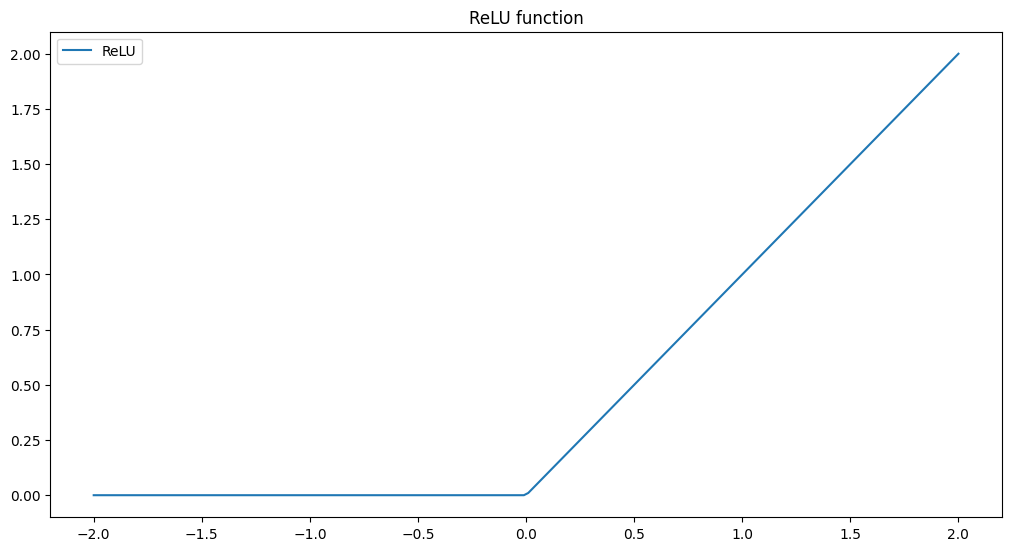

In [ ]:
x = torch.linspace(-2, 2, 200)
y = F.relu(x)

fig, ax = plt.subplots(figsize=(10, 5.4), layout='constrained')
ax.plot(x, y, label='ReLU')
ax.set_title("ReLU function")
ax.legend()
plt.show()

### Leaky ReLU

The leaky ReLU tries to solve the problem we mentioned earlier: the dying gradient problem.

Mathematically, the leaky ReLU requires a negative slope parameter, we'll denoted it by $\theta$.


In [ ]:
x = torch.randn((3, 3))

print(x)
print()
print(F.leaky_relu(x, negative_slope=0.01))
print()
print(torch.nn.LeakyReLU(negative_slope=0.01)(x))
print()
print(torch.maximum(x, 0.01 * x))

tensor([[-0.4821, -0.7379, -0.0350],
        [ 0.2547, -1.1141,  1.7502],
        [-0.7114,  1.1133,  1.1448]])

tensor([[-4.8208e-03, -7.3795e-03, -3.4972e-04],
        [ 2.5469e-01, -1.1141e-02,  1.7502e+00],
        [-7.1142e-03,  1.1133e+00,  1.1448e+00]])

tensor([[-4.8208e-03, -7.3795e-03, -3.4972e-04],
        [ 2.5469e-01, -1.1141e-02,  1.7502e+00],
        [-7.1142e-03,  1.1133e+00,  1.1448e+00]])

tensor([[-4.8208e-03, -7.3795e-03, -3.4972e-04],
        [ 2.5469e-01, -1.1141e-02,  1.7502e+00],
        [-7.1142e-03,  1.1133e+00,  1.1448e+00]])


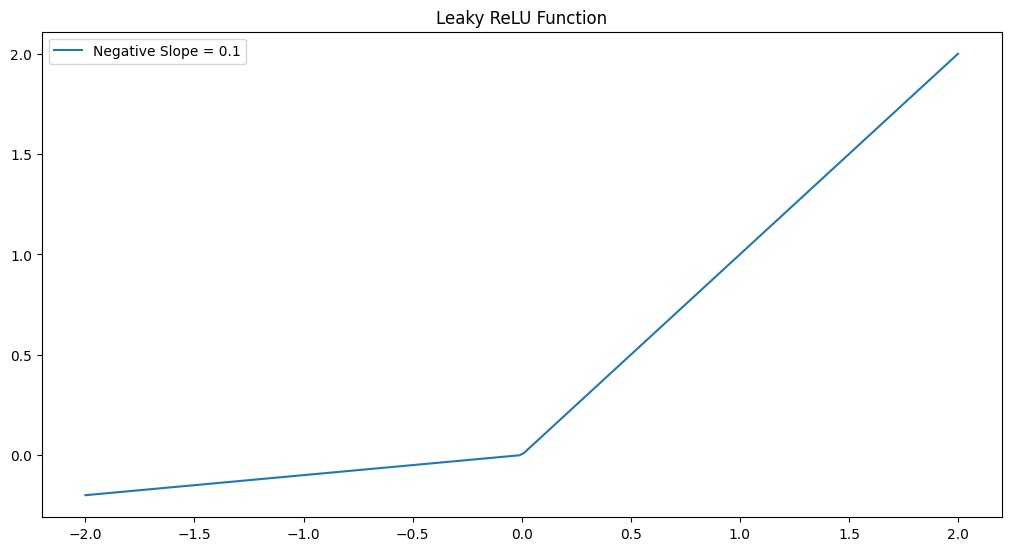

In [ ]:
x = torch.linspace(-2, 2, 200)
y = F.leaky_relu(x, negative_slope=0.1)

fig, ax = plt.subplots(figsize=(10, 5.4), layout='constrained')
ax.plot(x, y, label='Negative Slope = 0.1')
ax.set_title("Leaky ReLU Function")
ax.legend()
plt.show()

### Tanh

The tanh activation function stands for the hyperbolic tangent function.
You may or may not remember the trigonometric functions: sine, cosine, and tangent.
These functions are defined using the circle.
The hyperbolic functions are defined in a similar manner using the hyperbola.
If we write in terms of elementary functions:
$$
\operatorname{tanh}(x) = \frac{e^{x} - e^{-x}}{e^{x} + e^{-x}} = \frac{e^{2x} - 1}{e^{2x} + 1}.
$$

One of the primary reasons for using this function is that if it gets a very large negative answer, it converts that to a -1 and a very large positive answer is converted to a +1.
We can interpret -1 as very sure that our answer is no and we can interpret +1 as very sure that our answer is yes.

The drawback to this function is that for large values, positive or negative, the slope of the tangent line of the function is close to 0.
This will slow down our training.
This is one reason that ReLU is strongly preferred as an activation function.

In [ ]:
x = torch.randn((3, 3))

print(x)
print()
print(F.tanh(x))
print()
print(torch.nn.Tanh()(x))
print()
print((torch.exp(x) - torch.exp(-x)) / (torch.exp(x) + torch.exp(-x)))

tensor([[0.0972, 0.9910, 1.8373],
        [1.8697, 0.5435, 0.7401],
        [0.4992, 0.7371, 0.1630]])

tensor([[0.0969, 0.7578, 0.9505],
        [0.9536, 0.4956, 0.6292],
        [0.4615, 0.6274, 0.1615]])

tensor([[0.0969, 0.7578, 0.9505],
        [0.9536, 0.4956, 0.6292],
        [0.4615, 0.6274, 0.1615]])

tensor([[0.0969, 0.7578, 0.9505],
        [0.9536, 0.4956, 0.6292],
        [0.4615, 0.6274, 0.1615]])


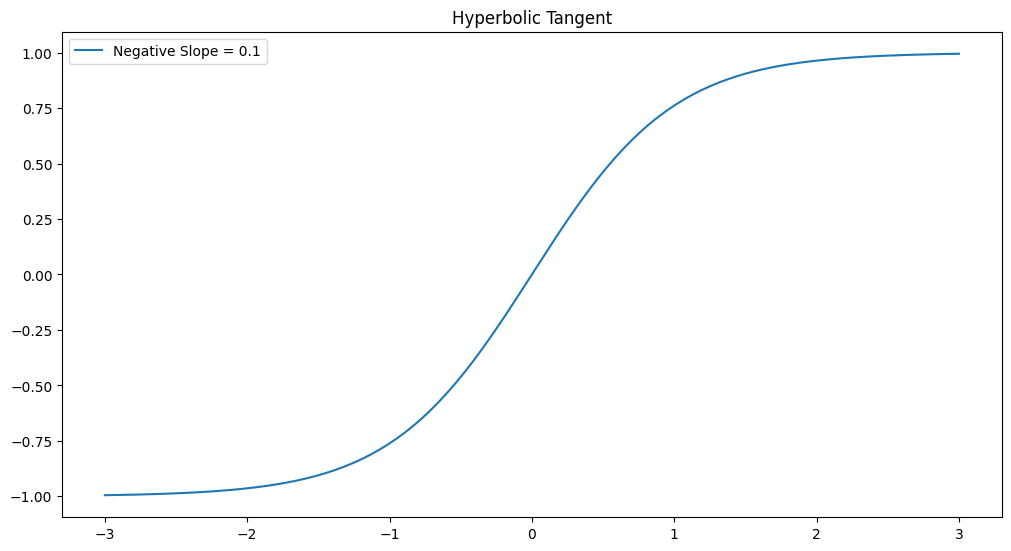

In [ ]:
x = torch.linspace(-3, 3, 200)
y = F.tanh(x)

fig, ax = plt.subplots(figsize=(10, 5.4), layout='constrained')
ax.plot(x, y, label='Negative Slope = 0.1')
ax.set_title("Hyperbolic Tangent")
ax.legend()
plt.show()

### Softmax

When you have multiple elements, you often want to find the largest element.
This is the maximum function.
An unfortunate characteristic of this function is that it's not differentiable and neural networks require differentiability.
This is where the softmax comes in.

Unlike the other functions, it takes in a vector and outputs a vector.
The output vector is supposed to represent a probability vector.

Suppose that we're given a vector:
$$
\textbf{x}  = [x_{1}, \ldots, x_{n}],
$$
then
$$
\operatorname{softmax}(x) = \left[\frac{e^{x_{1}}}{\sum_{i = 1}^{n} e^{x_{i}}}, \ldots, \frac{e^{x_{n}}}{\sum_{i = 1}^{n} e^{x_{i}}}\right]
$$

In [ ]:
x = torch.randn((1, 5))

print(x)
print()
print(F.softmax(x, dim=-1))
print(torch.sum(F.softmax(x, dim=-1)))
print()
print(torch.nn.Softmax(dim=-1)(x))
print(torch.sum(torch.nn.Softmax(dim=-1)(x)))
print()
print(torch.exp(x) / torch.sum(torch.exp(x)))
print(torch.sum(torch.exp(x) / torch.sum(torch.exp(x))))

tensor([[-1.1825, -0.5005,  0.1848, -0.8697,  0.7670]])

tensor([[0.0654, 0.1293, 0.2566, 0.0894, 0.4593]])
tensor(1.)

tensor([[0.0654, 0.1293, 0.2566, 0.0894, 0.4593]])
tensor(1.)

tensor([[0.0654, 0.1293, 0.2566, 0.0894, 0.4593]])
tensor(1.0000)


We won't have a graph for this one, because the graph for this function would be in a space that's of a higher dimension than the 3-d space we're all used to.

### Sigmoid

In [ ]:
x = torch.randn(3)

print(x)
print()
print(F.sigmoid(x))
print()
print(torch.nn.Sigmoid()(x))
print()
print(1 / (1 + torch.exp(-x)))

tensor([-1.2445, -0.0160, -1.6936])

tensor([0.2237, 0.4960, 0.1553])

tensor([0.2237, 0.4960, 0.1553])

tensor([0.2237, 0.4960, 0.1553])


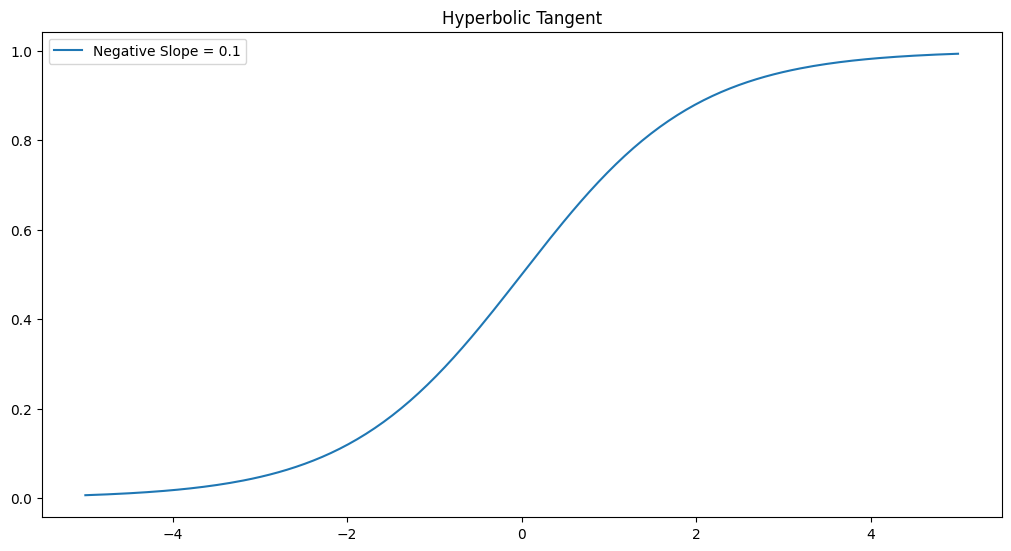

In [ ]:
x = torch.linspace(-5, 5, 200)
y = F.sigmoid(x)

fig, ax = plt.subplots(figsize=(10, 5.4), layout='constrained')
ax.plot(x, y, label='Negative Slope = 0.1')
ax.set_title("Hyperbolic Tangent")
ax.legend()
plt.show()

### GELU

The GELU function stands for the **G**aussian **E**rror **L**inear **U**nit.
It was introduced in 2016 by Dan Hendrycks Kevin Gimpel.
The purpose was to add a probabilistic interpretation to the ReLU function.
The GELU is intended to approximate the function
$$
x \times \Phi(x),
$$
where $\Phi(x)$ is the cumulative distribution function (cdf) of the normal distribution.

The following is a plot of the normal distribution.

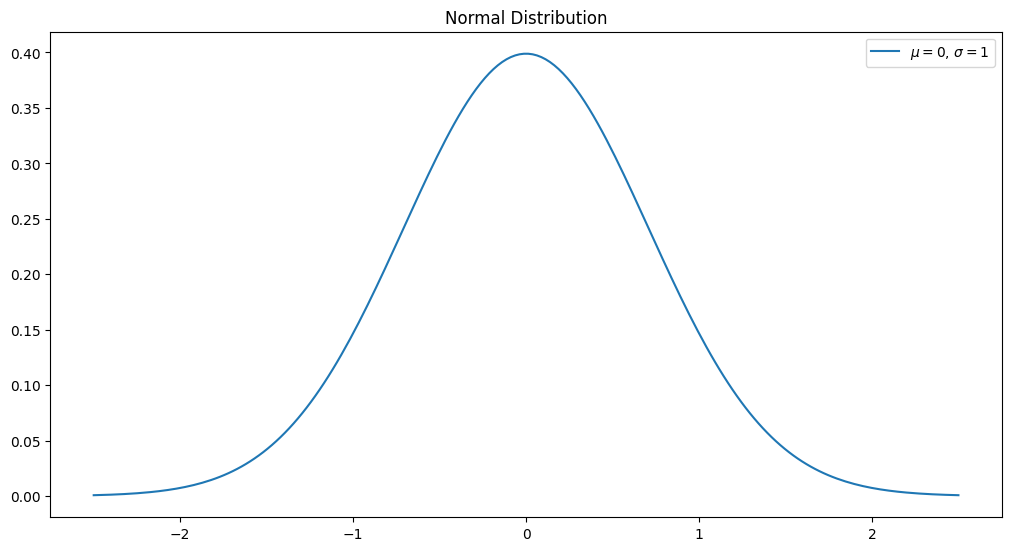

In [ ]:
x = np.linspace(-2.5, 2.5, 200)
y = (1 / np.sqrt(2 * np.pi)) * np.exp(-np.square(x))

fig, ax = plt.subplots(figsize=(10, 5.4), layout='constrained')
ax.plot(x, y, label='$\mu = 0$, $\sigma=1$')
ax.set_title("Normal Distribution")
ax.legend()
plt.show()

The approximation of the cdf of the normal distribution that the GELU uses is the following function:
$$
0.5 \left(1 + \tanh\left(\sqrt\frac{2}{\pi} (x + 0.044715 x^{3})\right) \right)
$$

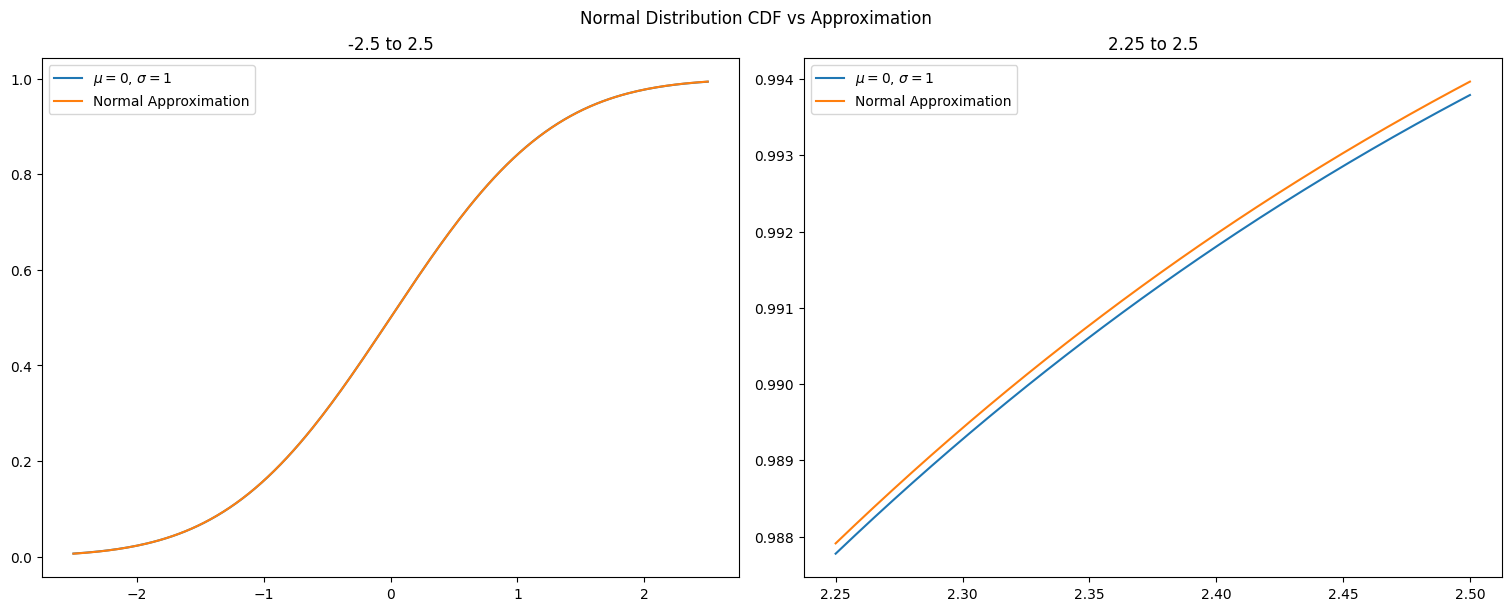

In [ ]:
x1 = np.linspace(-2.5, 2.5, 200)
y1 = 0.5 * (1 + erf(x1 / np.sqrt(2)))
z1 = 0.5 * (1 + np.tanh(np.sqrt(2 / np.pi) * (x1 + 0.044715 * np.power(x1, 3))))

x2 = np.linspace(2.25, 2.5, 200)
y2 = 0.5 * (1 + erf(x2 / np.sqrt(2)))
z2 = 0.5 * (1 + np.tanh(np.sqrt(2 / np.pi) * (x2 + 0.044715 * np.power(x2, 3))))

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 6), layout='constrained')
ax1.plot(x1, y1, label='$\mu = 0$, $\sigma=1$')
ax1.plot(x1, z1, label='Normal Approximation')
ax1.set_title("-2.5 to 2.5")
ax1.legend()
ax2.plot(x2, y2, label='$\mu = 0$, $\sigma=1$')
ax2.plot(x2, z2, label='Normal Approximation')
ax2.set_title("2.25 to 2.5")
ax2.legend()
fig.suptitle('Normal Distribution CDF vs Approximation')
plt.show()

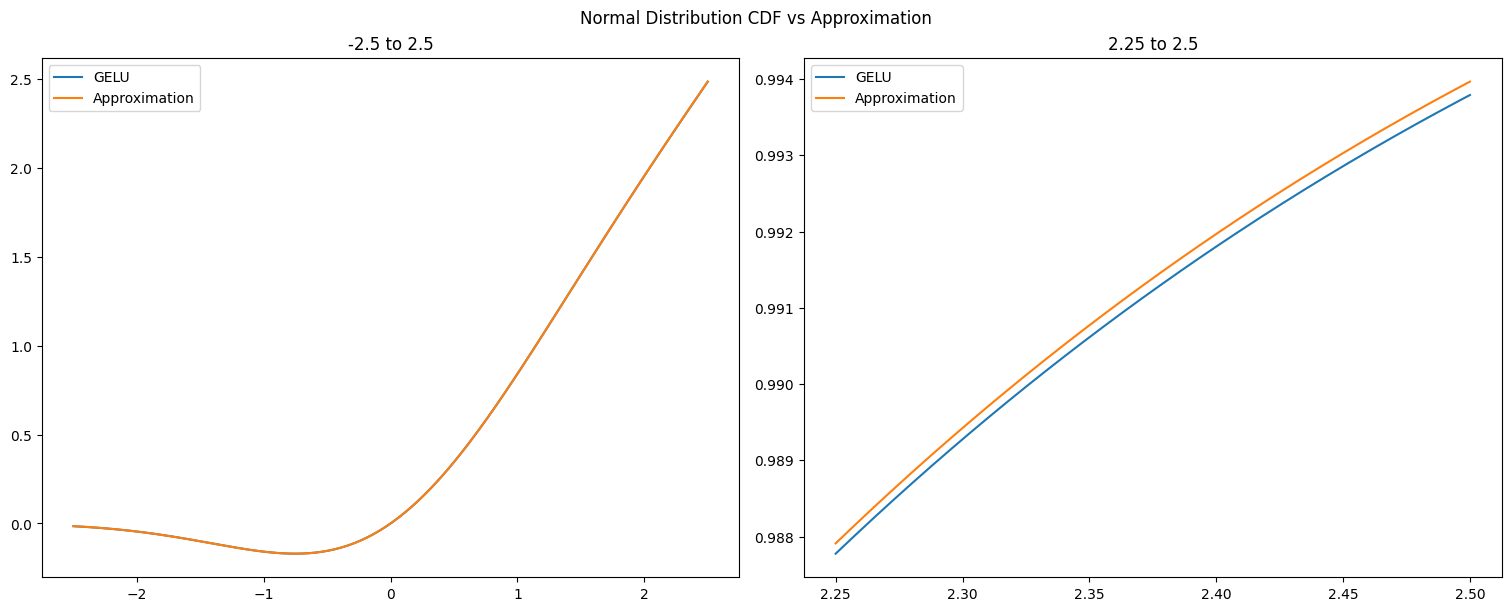

In [ ]:
x1 = np.linspace(-2.5, 2.5, 200)
y1 = 0.5 * (1 + erf(x1 / np.sqrt(2))) * x
z1 = 0.5 * (1 + np.tanh(np.sqrt(2 / np.pi) * (x1 + 0.044715 * np.power(x1, 3)))) * x

x2 = np.linspace(2.25, 2.5, 200)
y2 = 0.5 * (1 + erf(x2 / np.sqrt(2)))
z2 = 0.5 * (1 + np.tanh(np.sqrt(2 / np.pi) * (x2 + 0.044715 * np.power(x2, 3))))

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 6), layout='constrained')
ax1.plot(x1, y1, label='GELU')
ax1.plot(x1, z1, label='Approximation')
ax1.set_title("-2.5 to 2.5")
ax1.legend()
ax2.plot(x2, y2, label='GELU')
ax2.plot(x2, z2, label='Approximation')
ax2.set_title("2.25 to 2.5")
ax2.legend()
fig.suptitle('Normal Distribution CDF vs Approximation')
plt.show()

In [ ]:
x = torch.randn(3, 3)

print(x)
print()
print(F.gelu(x)) # Has another parameter "approximate='none'"
print()
print(torch.nn.GELU()(x)) # Has another parameter "approximate='none'"
print()
print(0.5 * x * (1 + torch.tanh(torch.sqrt(torch.tensor([2 / torch.pi])) * (x + 0.044715 * torch.pow(x, 3)))))

tensor([[ 0.5690,  1.1956,  0.8307],
        [-0.1545,  1.2362, -0.7222],
        [ 0.8141,  1.9487,  1.7236]])

tensor([[ 0.4070,  1.0570,  0.6620],
        [-0.0678,  1.1025, -0.1698],
        [ 0.6449,  1.8987,  1.6505]])

tensor([[ 0.4070,  1.0570,  0.6620],
        [-0.0678,  1.1025, -0.1698],
        [ 0.6449,  1.8987,  1.6505]])

tensor([[ 0.4070,  1.0567,  0.6619],
        [-0.0678,  1.1022, -0.1698],
        [ 0.6448,  1.8987,  1.6504]])
